<a href="https://colab.research.google.com/github/wordman2/GINN/blob/main/Abschnitt_7_Aufgaben.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GINN Teil 7

## Imports

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

## Effekte der L1 und L2 Regularisierung

Spielen Sie https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/playground-exercise-examining-l2-regularization und https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization durch und dokumentieren Sie Ihre Erkenntnisse.

## Simulation

 Gegeben ist die folgende Funktion zur Simulation von Daten. Erstellen Sie darauf basierend ein PyTorch neuronales Netz mit einem dense Hidden Layer (150 Neuronen, ReLU Aktivierung) und MSE Loss. Trainieren Sie mit dem ADAM Optimizer für 50 Epochen und der Lernrate 0.001. Erstellen Sie eine Variante  jeweile mit L1 bzw. L2 Loss ($\lambda=0.01$) und visualisieren Sie die Modellgewichte als Histogramm. Was fällt Ihnen auf bzw. wie verhalten sich die Ergebnisse zu den Erkenntnissen der vorherigen Aufgabe?

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

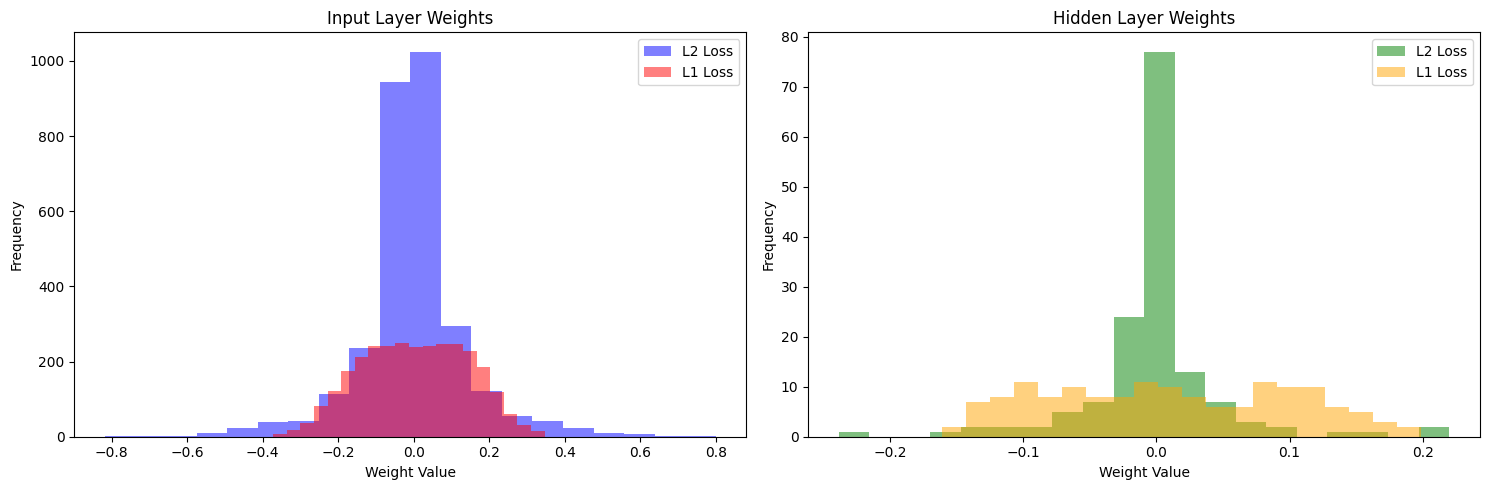

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network architecture and move it to the appropriate device
input_size = 20
nr_neurons = 150

# Original Model with L2 Loss
model_l2 = nn.Sequential(
    nn.Linear(input_size, nr_neurons),
    nn.Linear(nr_neurons, 1),
    nn.ReLU()
).to(device)

# Modified Model with L1 Loss
model_l1 = nn.Sequential(
    nn.Linear(input_size, nr_neurons),
    nn.Linear(nr_neurons, 1),
    nn.ReLU()
).to(device)

# Define dataset and dataloader
torch.manual_seed(0)
X_tensor = torch.randn(1000, 20).to(device)
weights_true = torch.randn(20, 1).to(device)
y_tensor = X_tensor @ weights_true + torch.randn(1000, 1).to(device)
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Training parameters
n_epochs = 50
lr_l1 = 0.001
lr_l2 = 0.01
loss_function_l2 = nn.MSELoss()  # L2 Loss
loss_function_l1 = nn.L1Loss()    # L1 Loss
optimizer_l2 = optim.Adam(model_l2.parameters(), lr=lr_l2)  # Optimizer for L2 Loss
optimizer_l1 = optim.Adam(model_l1.parameters(), lr=lr_l1)  # Optimizer for L1 Loss

# Training loop for both models
for epoch in range(n_epochs):
    # Training loop for model with L2 loss
    for X_batch, y_batch in dataloader:
        optimizer_l2.zero_grad()
        y_pred = model_l2(X_batch)
        loss = loss_function_l2(y_pred, y_batch)
        loss.backward()
        optimizer_l2.step()

    # Training loop for model with L1 loss
    for X_batch, y_batch in dataloader:
        optimizer_l1.zero_grad()
        y_pred = model_l1(X_batch)
        loss = loss_function_l1(y_pred, y_batch)
        loss.backward()
        optimizer_l1.step()

# Get weights for both models and move them to CPU
weights_input_layer_l2 = list(model_l2.named_parameters())[0][1].detach().cpu().numpy()
weights_hidden_layer_l2 = list(model_l2.named_parameters())[2][1].detach().cpu().numpy()

weights_input_layer_l1 = list(model_l1.named_parameters())[0][1].detach().cpu().numpy()
weights_hidden_layer_l1 = list(model_l1.named_parameters())[2][1].detach().cpu().numpy()

# Plot histograms for both models on one plot per layer
plt.figure(figsize=(15, 5))

# Input Layer
plt.subplot(1, 2, 1)
plt.hist(weights_input_layer_l2.flatten(), bins=20, color='blue', alpha=0.5, label='L2 Loss')
plt.hist(weights_input_layer_l1.flatten(), bins=20, color='red', alpha=0.5, label='L1 Loss')
plt.title('Input Layer Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.legend()

# Hidden Layer
plt.subplot(1, 2, 2)
plt.hist(weights_hidden_layer_l2.flatten(), bins=20, color='green', alpha=0.5, label='L2 Loss')
plt.hist(weights_hidden_layer_l1.flatten(), bins=20, color='orange', alpha=0.5, label='L1 Loss')
plt.title('Hidden Layer Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


L1 is more scattered and flatter than L2. Most weights of L2 are close to 0.0

## Regularisierung formulieren

Formulieren Sie die Verlustfunktion inkl. Regularisierungsterm (L1 bzw. L2) für den allgemeinen Fall eines tiefen neuronalen Netzes mit $n$ dense Layern.

Warum werden Bias-Parameter nicht mit regularisiert?

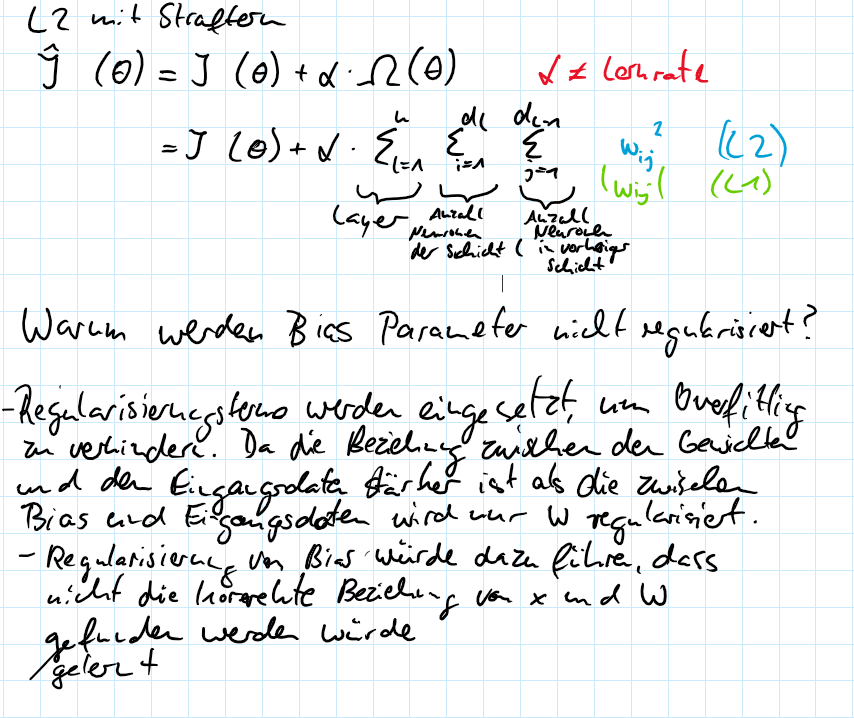